In [10]:
import pandas as pd
import sqlite3

In [22]:
covid = pd.read_csv('../static/data/전국코로나지역별.csv')
covid.tail()

,날짜,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울,검역,합계
299,2020-12-25,20,15,67,5,14,80,42,14,264,1,12,13,36,55,23,22,552,6,1241
300,2020-12-26,24,22,34,6,37,61,38,36,255,1,8,11,28,55,13,27,466,10,1132
301,2020-12-27,7,44,34,5,8,58,24,23,241,6,1,8,17,61,21,40,362,10,970
302,2020-12-28,11,25,46,7,1,35,31,27,193,2,2,3,12,46,24,34,300,8,807
303,2020-12-29,5,16,28,4,8,27,22,21,256,4,4,30,15,32,29,17,522,5,1045


In [18]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      274 non-null    object
 1   제주      274 non-null    int64 
 2   경남      274 non-null    int64 
 3   경북      274 non-null    int64 
 4   전남      274 non-null    int64 
 5   전북      274 non-null    int64 
 6   충남      274 non-null    int64 
 7   충북      274 non-null    int64 
 8   강원      274 non-null    int64 
 9   경기      274 non-null    int64 
 10  세종      274 non-null    int64 
 11  울산      274 non-null    int64 
 12  대전      274 non-null    int64 
 13  광주      274 non-null    int64 
 14  인천      274 non-null    int64 
 15  대구      274 non-null    int64 
 16  부산      274 non-null    int64 
 17  서울      274 non-null    int64 
 18  합계      274 non-null    int64 
dtypes: int64(18), object(1)
memory usage: 40.8+ KB


In [49]:
params = list(covid.iloc[0,:])
params

['2020-03-01', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
conn = sqlite3.connect('covid.db')
cur = conn.cursor()

In [24]:
sql_delete = 'drop table region;'
cur.execute(sql_delete)
conn.commit()

In [25]:
sql_create = '''
create table if not exists region (
	ilja text not null primary key,
seoul int default 0, busan int default 0, daegu int default 0,
incheon int default 0, daejeon int default 0, gwangju int default 0,
ulsan int default 0, sejong int default 0, gyeonggi int default 0,
gangwon int default 0, chungbuk int default 0, chungnam int default 0,
gyeongbuk int default 0, gyeongnam int default 0,jeonbuk int default 0,
jeonnam int default 0, jeju int default 0,
gye int default 0);'''
cur.execute(sql_create)
conn.commit()

In [26]:
sql_insert = 'insert into region values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)'

In [27]:
for i in range(len(covid)):
    params = [covid.iloc[i,0]]
    for k in range(1,19):
        params.append(int(covid.iloc[i,k]))
    cur.execute(sql_insert, params)
    conn.commit()

In [81]:
import requests
from urllib.parse import urlparse,quote
import pandas as pd
from bs4 import BeautifulSoup

In [77]:
from tqdm import tqdm_notebook
import datetime

In [79]:
key_fd = open('../static/data/covid19apikey.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()

In [74]:
datetime.datetime.today().strftime("%Y-%m-%d")

'2020-12-21'

In [82]:
# 1page만 해보기
dict_list=[]
day_delta = datetime.timedelta(days=1)
a1 = '2020-11-30'
b1 = '2020-12-23'
start = datetime.datetime.strptime(a1, '%Y-%m-%d')
end = datetime.datetime.strptime(b1, '%Y-%m-%d')
for i in tqdm_notebook(range((end - start).days)):
    date = (start + i*day_delta)
    raw_dict = {'날짜': date,'제주':0, '경남':0,'경북':0,'전남':0,'전북':0,'충남':0,'충북':0,'강원':0,'경기':0,'세종':0,'울산':0,'대전':0,'광주':0,'인천':0,'대구':0,'부산':0,'서울':0}
    start_date = date.strftime('%Y%m%d')
    end_date = date.strftime('%Y%m%d')
    page = 1
    corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    url = f'{corona_url}?ServiceKey={govapi_key}&pageNo={page}&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text,'xml')
    items = soup.find_all('item')
    for k in range(len(items)):
        raw_dict[items[k].find('gubun').get_text()] = int(items[k].find('incDec').get_text())
    dict_list.append(raw_dict)
df_corona = pd.DataFrame(dict_list)
df_corona

,날짜,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울,검역,합계
0,2020-11-30,1,20,4,4,16,5,22,8,77,1,3,5,13,34,4,52,159,10,438
1,2020-12-01,1,11,11,2,9,16,32,9,96,2,3,10,22,16,11,31,155,14,451
2,2020-12-02,2,7,5,1,26,8,16,12,144,7,10,5,10,23,4,32,193,6,511
3,2020-12-03,1,13,11,2,9,14,10,8,141,4,2,7,3,22,3,15,262,13,540
4,2020-12-04,2,16,9,3,14,23,5,3,160,0,5,21,1,17,6,31,295,18,629
5,2020-12-05,1,27,17,4,17,10,18,9,157,4,1,10,6,19,7,29,235,12,583
6,2020-12-06,0,16,11,8,12,15,14,12,184,3,3,3,5,42,3,34,254,12,631
7,2020-12-07,0,16,9,3,22,10,11,9,156,0,38,2,5,40,5,35,244,10,615
8,2020-12-08,2,13,5,7,13,15,10,8,157,1,61,11,11,28,4,27,214,7,594
9,2020-12-09,2,31,4,2,12,4,24,5,218,1,14,10,9,48,3,20,270,9,686


In [83]:
del df_corona['검역']
df_corona.fillna(0,inplace=True)

In [84]:
df_corona

,날짜,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울,합계
0,2020-11-30,1,20,4,4,16,5,22,8,77,1,3,5,13,34,4,52,159,438
1,2020-12-01,1,11,11,2,9,16,32,9,96,2,3,10,22,16,11,31,155,451
2,2020-12-02,2,7,5,1,26,8,16,12,144,7,10,5,10,23,4,32,193,511
3,2020-12-03,1,13,11,2,9,14,10,8,141,4,2,7,3,22,3,15,262,540
4,2020-12-04,2,16,9,3,14,23,5,3,160,0,5,21,1,17,6,31,295,629
5,2020-12-05,1,27,17,4,17,10,18,9,157,4,1,10,6,19,7,29,235,583
6,2020-12-06,0,16,11,8,12,15,14,12,184,3,3,3,5,42,3,34,254,631
7,2020-12-07,0,16,9,3,22,10,11,9,156,0,38,2,5,40,5,35,244,615
8,2020-12-08,2,13,5,7,13,15,10,8,157,1,61,11,11,28,4,27,214,594
9,2020-12-09,2,31,4,2,12,4,24,5,218,1,14,10,9,48,3,20,270,686


In [85]:
df_corona = df_corona.astype({'날짜':'str'})

In [86]:
df_corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      23 non-null     object
 1   제주      23 non-null     int64 
 2   경남      23 non-null     int64 
 3   경북      23 non-null     int64 
 4   전남      23 non-null     int64 
 5   전북      23 non-null     int64 
 6   충남      23 non-null     int64 
 7   충북      23 non-null     int64 
 8   강원      23 non-null     int64 
 9   경기      23 non-null     int64 
 10  세종      23 non-null     int64 
 11  울산      23 non-null     int64 
 12  대전      23 non-null     int64 
 13  광주      23 non-null     int64 
 14  인천      23 non-null     int64 
 15  대구      23 non-null     int64 
 16  부산      23 non-null     int64 
 17  서울      23 non-null     int64 
 18  합계      23 non-null     int64 
dtypes: int64(18), object(1)
memory usage: 3.5+ KB


In [87]:
# 오늘까지 데이터 DB에 넣기
sql_insert = 'insert into region values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)'
for i in range(len(df_corona)):
    params = [df_corona.iloc[i,0]]
    for k in range(1,19):
        params.append(int(df_corona.iloc[i,k]))
    cur.execute(sql_insert, params)
    conn.commit()

In [109]:
corona_gender = pd.read_csv('../static/data/agender_covid.csv')
corona_gender

,구분,확진자,확진률,사망자,사망률,치명률,등록일자
0,0-9,1684,3.33,0,0.00,0.00,2020-12-21
1,10-19,3150,6.23,0,0.00,0.00,2020-12-21
2,20-29,8552,16.90,0,0.00,0.00,2020-12-21
3,30-39,6414,12.68,3,0.43,0.05,2020-12-21
4,40-49,7099,14.03,6,0.86,0.08,2020-12-21
...,...,...,...,...,...,...,...
2823,60-69,1235,12.62,22,13.58,1.78,2020-04-02
2824,70-79,651,6.65,46,28.40,7.07,2020-04-02
2825,80 이상,442,4.52,82,50.62,18.55,2020-04-02
2826,여성,5881,60.10,80,49.38,1.36,2020-04-02


In [110]:
corona_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      2828 non-null   object 
 1   확진자     2828 non-null   int64  
 2   확진률     2828 non-null   float64
 3   사망자     2828 non-null   int64  
 4   사망률     2828 non-null   float64
 5   치명률     2828 non-null   float64
 6   등록일자    2828 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 154.8+ KB


In [111]:
d = dict.fromkeys(corona_gender.select_dtypes(np.int64).columns, str)
corona_gender = corona_gender.astype(d)

In [112]:
corona_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2828 entries, 0 to 2827
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분      2828 non-null   object 
 1   확진자     2828 non-null   object 
 2   확진률     2828 non-null   float64
 3   사망자     2828 non-null   object 
 4   사망률     2828 non-null   float64
 5   치명률     2828 non-null   float64
 6   등록일자    2828 non-null   object 
dtypes: float64(3), object(4)
memory usage: 154.8+ KB


In [107]:
sql_delete = "drop table agender"
cur.execute(sql_delete)
conn.commit()

In [108]:
sql_create = '''
create table agender (
gubun text not null, confCase integer default 0, confCaseRate float default 0,
death integer default 0, deathRate float default 0, criticalRate float default 0,
createDt text not null);'''
cur.execute(sql_create)
conn.commit()

In [113]:
sql_insert = 'insert into agender(createDt,gubun,confCase,confCaseRate,death,deathRate,criticalRate) values(?,?,?,?,?,?,?)'
for i in range(len(corona_gender)):
    params = [corona_gender.iloc[i,-1],corona_gender.iloc[i,0]]
    for k in range(1,6):
        params.append(corona_gender.iloc[i,k])
    cur.execute(sql_insert, params)
    conn.commit()

In [173]:
df_region = pd.read_csv('../static/data/전국코로나현황.csv')
df_region.head()

,기준시간,광역시도,사망자,확진자,전일대비,격리해제,격리중,지역발생,해외유입,10만명당
0,2020-12-22,검역,1,2361,18,1658,702,0,18,-
1,2020-12-22,제주,0,271,19,103,168,19,0,40.40
2,2020-12-22,경남,3,1095,18,768,324,18,0,32.58
3,2020-12-22,경북,61,2094,59,1721,312,58,1,78.65
4,2020-12-22,전남,5,513,5,425,83,4,1,27.51


In [174]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766 entries, 0 to 5765
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준시간    5766 non-null   object
 1   광역시도    5766 non-null   object
 2   사망자     5766 non-null   int64 
 3   확진자     5766 non-null   int64 
 4   전일대비    5766 non-null   int64 
 5   격리해제    5766 non-null   int64 
 6   격리중     5766 non-null   int64 
 7   지역발생    5766 non-null   int64 
 8   해외유입    5766 non-null   int64 
 9   10만명당   5766 non-null   object
dtypes: int64(7), object(3)
memory usage: 450.6+ KB


In [175]:
d = dict.fromkeys(df_region.select_dtypes(np.int64).columns, str)
df_region = df_region.astype(d)
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766 entries, 0 to 5765
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준시간    5766 non-null   object
 1   광역시도    5766 non-null   object
 2   사망자     5766 non-null   object
 3   확진자     5766 non-null   object
 4   전일대비    5766 non-null   object
 5   격리해제    5766 non-null   object
 6   격리중     5766 non-null   object
 7   지역발생    5766 non-null   object
 8   해외유입    5766 non-null   object
 9   10만명당   5766 non-null   object
dtypes: object(10)
memory usage: 450.6+ KB


In [135]:
len(df_region[df_region['기준시간']=='2020-12-19'])

38

In [176]:
df_region[df_region['기준시간']=='2020-12-17']

,기준시간,광역시도,사망자,확진자,전일대비,격리해제,격리중,지역발생,해외유입,10만명당
114,2020-12-17,검역,1,2311,7,1654,656,0,7,-
115,2020-12-17,제주,0,154,12,82,72,12,0,22.96
116,2020-12-17,경남,2,935,30,677,256,30,0,27.82
117,2020-12-17,경북,59,1902,9,1686,157,9,0,71.44
118,2020-12-17,전남,4,485,0,404,77,0,0,26.01
119,2020-12-17,전북,4,615,19,405,206,18,1,33.84
120,2020-12-17,충남,15,1210,19,893,302,17,2,57.01
121,2020-12-17,충북,7,622,19,363,252,19,0,38.89
122,2020-12-17,강원,13,851,9,655,183,9,0,55.24
123,2020-12-17,경기,151,10871,291,7820,2900,284,7,82.04


In [145]:
len([5075, 5076, 5077,
            5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086, 5087, 5088,
            5089, 5090, 5091, 5092, 5093]),len([5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5066,
            5067, 5068, 5069, 5070, 5071, 5072, 5073, 5074])

(19, 19)

In [140]:
for i in pd.date_range(start='20200302', end='20201222'):
    date = i.strftime("%Y-%m-%d")
    if len(df_region[df_region['기준시간']==date])>19:
        print(date,len(df_region[df_region['기준시간']==date]),df_region[df_region['기준시간']==date].index)

2020-04-08 38 Int64Index([5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5066,
            5067, 5068, 5069, 5070, 5071, 5072, 5073, 5074, 5075, 5076, 5077,
            5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086, 5087, 5088,
            5089, 5090, 5091, 5092, 5093],
           dtype='int64')
2020-06-05 38 Int64Index([3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964,
            3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975,
            3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986,
            3987, 3988, 3989, 3990, 3991],
           dtype='int64')
2020-09-24 38 Int64Index([1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
            1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
            1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
            1878, 1879, 1880, 1881, 1882],
           dtype='int64')
2020-09-26 38 Int64Index([1788, 1789, 1790, 1791,

In [177]:
df_region.drop([
            5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083,
            5084, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5092, 5093, 
            3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 
            3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 
            1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 
            1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
            1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 
            1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 
            1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 
            1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711,
            1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 
            1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 
            1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 
            1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 
            1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 
            1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293,
            553, 554, 555, 556, 557, 558, 559, 560, 561, 
            562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 
            456, 476,
            133, 134, 135, 136, 137, 138, 139, 140, 141, 
            142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 
            57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 
            68, 69, 70, 71, 72, 73, 74, 75],inplace=True)

In [178]:
sql_delete = "drop table daily"
cur.execute(sql_delete)
conn.commit()

In [179]:
sql_table = '''create table if not exists daily (
  stdDay text not null,
  deathCnt int not null,
  defCnt int not null,
  gubun text not null,
  incDec int not null,
  isolClearCnt int not null,
  isolIngCnt int not null,
  localOccCnt int not null,
  overFlowCnt int not null,
  qurRate float);
'''
cur.execute(sql_table)
conn.commit()

In [180]:
sql_insert = '''insert into daily (stdDay, deathCnt, defCnt, gubun, incDec, isolClearCnt,
isolIngCnt, localOccCnt, overFlowCnt, qurRate) values(?,?,?,?,?,?,?,?,?,?);
'''
for i in df_region.index:    
    params=[]
    params = [df_region['기준시간'][i], int(df_region['사망자'][i]), int(df_region['확진자'][i]), 
              df_region['광역시도'][i], int(df_region['전일대비'][i]), int(df_region['격리해제'][i]), 
              int(df_region['격리중'][i]), int(df_region['지역발생'][i]), int(df_region['해외유입'][i])]
    params.append(None if df_region['10만명당'][i]=='-' else float(df_region['10만명당'][i]))
    cur.execute(sql_insert, params)
    conn.commit()

In [118]:
for i in df_region.index:    
    params=[]
    params = [df_region['기준시간'][i], int(df_region['사망자'][i]), int(df_region['확진자'][i]), 
              df_region['광역시도'][i], int(df_region['전일대비'][i]), int(df_region['격리해제'][i]), 
              int(df_region['격리중'][i]), int(df_region['지역발생'][i]), int(df_region['해외유입'][i])]
    params.append(None if df_region['10만명당'][i]=='-' else float(df_region['10만명당'][i]))
    print(params)

24', 0, 120, '충남', 0, 56, 0, 0, 0, 5.65]
['2020-03-24', 0, 38, '충북', 1, 11, 0, 0, 0, 2.38]
['2020-03-24', 1, 30, '강원', 0, 14, 0, 0, 0, 1.95]
['2020-03-24', 4, 366, '경기', 15, 97, 0, 0, 0, 2.76]
['2020-03-24', 0, 42, '세종', 0, 3, 0, 0, 0, 12.27]
['2020-03-24', 0, 36, '울산', 0, 18, 0, 0, 0, 3.14]
['2020-03-24', 0, 24, '대전', 0, 6, 0, 0, 0, 1.63]
['2020-03-24', 0, 19, '광주', 0, 11, 0, 0, 0, 1.3]
['2020-03-24', 0, 41, '인천', 1, 8, 0, 0, 0, 1.39]
['2020-03-24', 88, 6442, '대구', 31, 2571, 0, 0, 0, 264.4]
['2020-03-24', 1, 111, '부산', 2, 71, 0, 0, 0, 3.25]
['2020-03-24', 0, 334, '서울', 4, 72, 0, 0, 0, 3.43]
['2020-03-24', 120, 9037, '합계', 76, 3507, 0, 0, 0, 17.43]
['2020-03-23', 0, 47, '검역', 13, 0, 0, 0, 0, None]
['2020-03-23', 0, 4, '제주', 0, 3, 0, 0, 0, 0.6]
['2020-03-23', 0, 89, '경남', 1, 45, 0, 0, 0, 2.65]
['2020-03-23', 24, 1256, '경북', 2, 469, 0, 0, 0, 47.17]
['2020-03-23', 0, 6, '전남', 0, 3, 0, 0, 0, 0.32]
['2020-03-23', 0, 10, '전북', 0, 7, 0, 0, 0, 0.55]
['2020-03-23', 0, 120, '충남', 0, 44, 0, 0, 0,

In [62]:
conn = sqlite3.connect('./covid.db')
cur = conn.cursor()
sql_select = "select * from region where stdDay = ?;"
cur.execute(sql_select,('2020-12-20',))
rows = cur.fetchall()
rows

[(39, '2020-12-20', 1, 2333, '검역', 9, 1657, 675, 0, 9, None),
 (40, '2020-12-20', 0, 229, '제주', 24, 93, 136, 24, 0, 34.14),
 (41, '2020-12-20', 2, 1062, '경남', 51, 734, 326, 49, 2, 31.59),
 (42, '2020-12-20', 60, 1987, '경북', 25, 1711, 216, 23, 2, 74.63),
 (43, '2020-12-20', 5, 499, '전남', 4, 418, 76, 4, 0, 26.76),
 (44, '2020-12-20', 6, 675, '전북', 29, 439, 230, 29, 0, 37.14),
 (45, '2020-12-20', 17, 1272, '충남', 20, 942, 313, 19, 1, 59.93),
 (46, '2020-12-20', 11, 770, '충북', 14, 415, 344, 14, 0, 48.14),
 (47, '2020-12-20', 13, 951, '강원', 55, 684, 254, 55, 0, 61.73),
 (48, '2020-12-20', 164, 11702, '경기', 249, 8082, 3456, 244, 5, 88.31),
 (49, '2020-12-20', 0, 129, '세종', 1, 121, 8, 0, 1, 37.68),
 (50, '2020-12-20', 14, 545, '울산', 6, 270, 261, 5, 1, 47.51),
 (51, '2020-12-20', 6, 696, '대전', 3, 559, 131, 3, 0, 47.21),
 (52, '2020-12-20', 3, 866, '광주', 14, 747, 116, 13, 1, 59.45),
 (53, '2020-12-20', 15, 2248, '인천', 62, 1573, 660, 62, 0, 76.05),
 (54, '2020-12-20', 200, 7497, '대구', 25, 7075, 2

In [56]:
import sqlite3
conn = sqlite3.connect('./covid.db')
cur = conn.cursor()
sql_select = 'select * from daily where ilja= ?;' 
cur.execute(sql_select, ('2020-03-07',))
rows = cur.fetchall()
for row in rows:
    for i in range(19):
        print(row[i])

2020-03-07
0
5
65
0
0
2
5
1
10
1
0
0
0
0
390
1
3
483


In [102]:
import sqlite3
conn = sqlite3.connect('./covid.db')
cur = conn.cursor()
sql_select = 'select * from agender where createDt= ?;' 
cur.execute(sql_select, ('2020-11-03',))
rows = cur.fetchall()
data_list = []
for row in rows:
    data_list.append(row[3])
print(data_list)

[2.64, 5.54, 19.47, 12.42, 13.48, 18.31, 15.87, 7.96, 4.32, 53.36, 46.64]


In [187]:
import sqlite3
conn = sqlite3.connect('./covid.db')
cur = conn.cursor()
gubun = ('합계',)
sql_select = 'select * from daily where gubun= ? order by stdDay limit 10 offset 284'
cur.execute(sql_select, gubun)
rows = cur.fetchall()
for row in rows:
    print(row)

('2020-12-14', 587, 43484, '합계', 718, 32102, 10795, 682, 36, 83.87)
('2020-12-15', 600, 44364, '합계', 880, 32559, 11205, 848, 32, 85.57)
('2020-12-16', 612, 45442, '합계', 1078, 32947, 11883, 1054, 24, 87.65)
('2020-12-17', 634, 46453, '합계', 1014, 33610, 12209, 993, 21, 89.6)
('2020-12-18', 645, 47515, '합계', 1062, 33982, 12888, 1036, 26, 91.64)
('2020-12-19', 659, 48570, '합계', 1053, 34334, 13577, 1029, 24, 93.68)
('2020-12-20', 674, 49665, '합계', 1097, 34722, 14269, 1072, 25, 95.79)
('2020-12-21', 698, 50591, '합계', 926, 35155, 14738, 892, 34, 154.51)
('2020-12-22', 722, 51460, '합계', 869, 35928, 14810, 824, 45, 99.25)
('2020-12-23', 739, 52550, '합계', 1092, 36726, 15085, 1060, 32, 101.35)


In [190]:
import sqlite3
conn = sqlite3.connect('./covid.db')
cur = conn.cursor()
gubun = ('합계',)
sql_select = 'select count(*) from daily where gubun=?'
cur.execute(sql_select, gubun)
row = cur.fetchone()

print(row[0])

294


In [41]:
df_seoul = pd.read_csv('../static/data/구별 코로나.csv')
df_seoul

,지역,지역별 합계,인구수,인구수당 누적확진자수
0,강남구,520.0,544085.0,0.000956
1,강동구,277.0,462275.0,0.000599
2,강북구,200.0,313550.0,0.000638
3,강서구,604.0,589536.0,0.001025
4,경기도,1.0,NaN,NaN
5,관악구,547.0,514555.0,0.001063
6,광진구,186.0,361923.0,0.000514
7,구로구,277.0,435751.0,0.000636
8,금천구,125.0,249641.0,0.000501
9,기타,234.0,NaN,NaN


In [44]:
df_seoul.drop([4,9,27],inplace=True)

In [47]:
df_seoul.reset_index(drop=True, inplace=True)

In [48]:
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지역           25 non-null     object 
 1   지역별 합계       25 non-null     float64
 2   인구수          25 non-null     float64
 3   인구수당 누적확진자수  25 non-null     float64
dtypes: float64(3), object(1)
memory usage: 928.0+ bytes


In [49]:
df_seoul

,지역,지역별 합계,인구수,인구수당 누적확진자수
0,강남구,520.0,544085.0,0.000956
1,강동구,277.0,462275.0,0.000599
2,강북구,200.0,313550.0,0.000638
3,강서구,604.0,589536.0,0.001025
4,관악구,547.0,514555.0,0.001063
5,광진구,186.0,361923.0,0.000514
6,구로구,277.0,435751.0,0.000636
7,금천구,125.0,249641.0,0.000501
8,노원구,478.0,529532.0,0.000903
9,도봉구,319.0,329300.0,0.000969


In [50]:
df_seoul.columns

Index(['지역', '지역별 합계', '인구수', '인구수당 누적확진자수'], dtype='object')

In [55]:
sql_delete = "drop table seoul"
cur.execute(sql_delete)
conn.commit()

In [56]:
conn = sqlite3.connect('./covid.db')
cur = conn.cursor()
sql_table = '''create table if not exists seoul (
  region text not null,
  totalCnt float,
  population float,
  cntPerPerson float);
'''
cur.execute(sql_table)
conn.commit()

In [57]:
df_seoul.columns

Index(['지역', '지역별 합계', '인구수', '인구수당 누적확진자수'], dtype='object')

In [58]:
sql_insert = '''insert into seoul values(?,?,?,?);
'''
for i in df_seoul.index:    
    params=[]
    params = [df_seoul['지역'][i],df_seoul['지역별 합계'][i],df_seoul['인구수'][i],df_seoul['인구수당 누적확진자수'][i]]
    cur.execute(sql_insert, params)
    conn.commit()

In [53]:
for i in df_seoul.index:    
    params=[]
    params = [df_seoul['지역'][i],df_seoul['지역별 합계'][i],df_seoul['인구수'][i],df_seoul['인구수당 누적확진자수'][i]]
    print(params)

['강남구', 520.0, 544085.0, 0.0009557330196568553]
['강동구', 277.0, 462275.0, 0.0005992104266940674]
['강북구', 200.0, 313550.0, 0.0006378568011481423]
['강서구', 604.0, 589536.0, 0.0010245345492047985]
['관악구', 547.0, 514555.0, 0.0010630544839715869]
['광진구', 186.0, 361923.0, 0.0005139214694838406]
['구로구', 277.0, 435751.0, 0.0006356841407133889]
['금천구', 125.0, 249641.0, 0.0005007190325307142]
['노원구', 478.0, 529532.0, 0.0009026838793500675]
['도봉구', 319.0, 329300.0, 0.0009687215305192832]
['동대문구', 312.0, 358679.0, 0.0008698585643430477]
['동작구', 389.0, 404617.0, 0.0009614030058054901]
['마포구', 293.0, 383494.0, 0.0007640275988672572]
['서대문구', 261.0, 323860.0, 0.0008059037855863645]
['서초구', 472.0, 429995.0, 0.0010976871824090976]
['성동구', 223.0, 302695.0, 0.0007367151753415154]
['성북구', 464.0, 449871.0, 0.0010314067810550138]
['송파구', 611.0, 676673.0, 0.0009029472137945508]
['양천구', 316.0, 460048.0, 0.0006868848467985949]
['영등포구', 309.0, 405982.0, 0.0007611174879674468]
['용산구', 226.0, 244953.0, 0.0009226259

In [91]:
import pandas as pd

df_seoul = pd.read_csv('../static/data/서울시 코로나19 확진자 현황.csv',encoding='euc-kr')
df_seoul

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,17430,12.26.,NaN,NaN,NaN,기타,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-27 09:50:26,2020-12-27 09:50:26,Y
1,17429,12.26.,NaN,NaN,NaN,기타,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-27 09:50:26,2020-12-27 09:50:26,Y
2,17428,12.26.,NaN,NaN,NaN,기타,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-27 09:50:26,2020-12-27 09:50:26,Y
3,17427,12.26.,NaN,NaN,NaN,기타,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-27 09:50:26,2020-12-27 09:50:26,Y
4,17426,12.26.,NaN,NaN,NaN,기타,NaN,동부구치소 관련,NaN,NaN,NaN,2020-12-27 09:50:26,2020-12-27 09:50:26,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17425,5,1.31.,NaN,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-24 13:44:14,Y
17426,4,1.30.,NaN,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-24 13:44:14,Y
17427,3,1.30.,NaN,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-24 13:44:14,Y
17428,2,1.30.,NaN,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-12-23 13:35:20,2020-12-24 13:44:14,Y


In [92]:
df_seoul = df_seoul[['확진일','지역']]

In [93]:
tmp_list = df_seoul['확진일'].tolist()
tmp = []
for i in tmp_list:
    if len(i.split('.')[0]) == 2:
        tmp.append('2020-'+'-'.join(i.split('.')[:-1]))
    else: 
        tmp.append('2020-0'+i.split('.')[0]+'-'+i.split('.')[1])


In [94]:
df_seoul['확진일'] = tmp
df_seoul

,확진일,지역
0,2020-12-26,기타
1,2020-12-26,기타
2,2020-12-26,기타
3,2020-12-26,기타
4,2020-12-26,기타
...,...,...
17425,2020-01-31,성북구
17426,2020-01-30,마포구
17427,2020-01-30,종로구
17428,2020-01-30,중랑구


In [95]:
df_seoul['확진자수'] = 1

In [96]:
df_seoul

,확진일,지역,확진자수
0,2020-12-26,기타,1
1,2020-12-26,기타,1
2,2020-12-26,기타,1
3,2020-12-26,기타,1
4,2020-12-26,기타,1
...,...,...,...
17425,2020-01-31,성북구,1
17426,2020-01-30,마포구,1
17427,2020-01-30,종로구,1
17428,2020-01-30,중랑구,1


In [148]:
colona_seoul = df_seoul.pivot_table('확진자수','확진일','지역',aggfunc='count')
colona_seoul.fillna(0.0,inplace=True)
colona_seoul.rename(columns={'All':'날짜별 합계'},index={'All':'지역별 합계'},inplace=True)
colona_seoul.head()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,금천구,기타,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,중로구,타시도
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-02-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [179]:
c.to_csv('../static/data/서울코로나.csv')

In [180]:
c = pd.read_csv('../static/data/서울코로나.csv',index_col='확진일')
c

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,금천구,기타,...,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,중로구,타시도,합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
2020-02-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,11.0,7.0,8.0,22.0,17.0,19.0,5.0,8.0,0.0,8.0,...,24.0,16.0,6.0,24.0,20.0,6.0,14.0,1.0,15.0,365.0
2020-12-23,6.0,3.0,9.0,34.0,15.0,13.0,12.0,5.0,0.0,7.0,...,11.0,9.0,8.0,10.0,7.0,4.0,14.0,0.0,14.0,307.0
2020-12-24,9.0,7.0,6.0,19.0,16.0,14.0,3.0,4.0,0.0,288.0,...,15.0,7.0,13.0,18.0,9.0,5.0,8.0,0.0,12.0,552.0


In [178]:
c['합계'] = c.sum(axis=1)

In [175]:
c

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,금천구,기타,...,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,중로구,타시도,합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN
2020-02-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,11.0,7.0,8.0,22.0,17.0,19.0,5.0,8.0,0.0,8.0,...,24.0,16.0,6.0,24.0,20.0,6.0,14.0,1.0,15.0,NaN
2020-12-23,6.0,3.0,9.0,34.0,15.0,13.0,12.0,5.0,0.0,7.0,...,11.0,9.0,8.0,10.0,7.0,4.0,14.0,0.0,14.0,NaN
2020-12-24,9.0,7.0,6.0,19.0,16.0,14.0,3.0,4.0,0.0,288.0,...,15.0,7.0,13.0,18.0,9.0,5.0,8.0,0.0,12.0,NaN


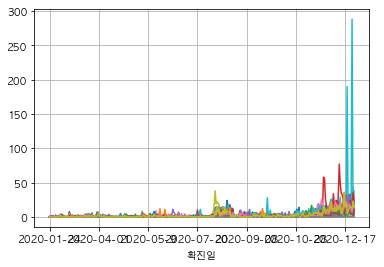

In [166]:
for col in colona_seoul.columns:
    colona_seoul[col].plot(grid=True)
plt.show()

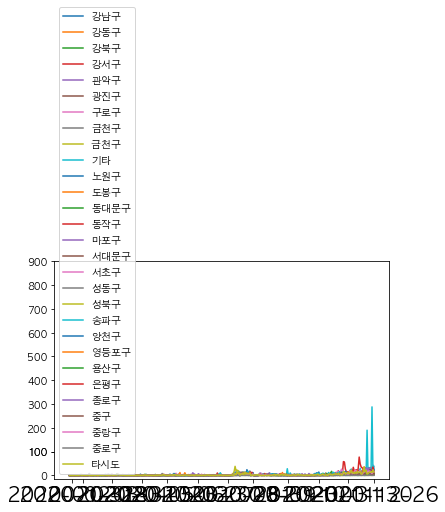

In [161]:
for col in colona_seoul.columns:
        plt.plot(x ,colona_seoul[col], '-',label=col); 
plt.xticks([2,14,43,73,99,130,161,186,222,253,283,309],labels=['2020-01-31','2020-02-28','2020-03-31','2020-04-30', '2020-05-31','2020-06-30','2020-07-31','2020-08-31','2020-09-30','2020-10-31','2020-11-30','2020-12-26'],fontsize=20)
plt.yticks([0,100,200,300,400,500,600,700,800,900,100])
plt.legend()
plt.show()

In [40]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [129]:
colona_seoul.index

Index(['2020-01-24', '2020-01-30', '2020-01-31', '2020-02-16', '2020-02-19',
       '2020-02-2', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       ...
       '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22',
       '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26', '지역별 합계'],
      dtype='object', name='확진일', length=311)

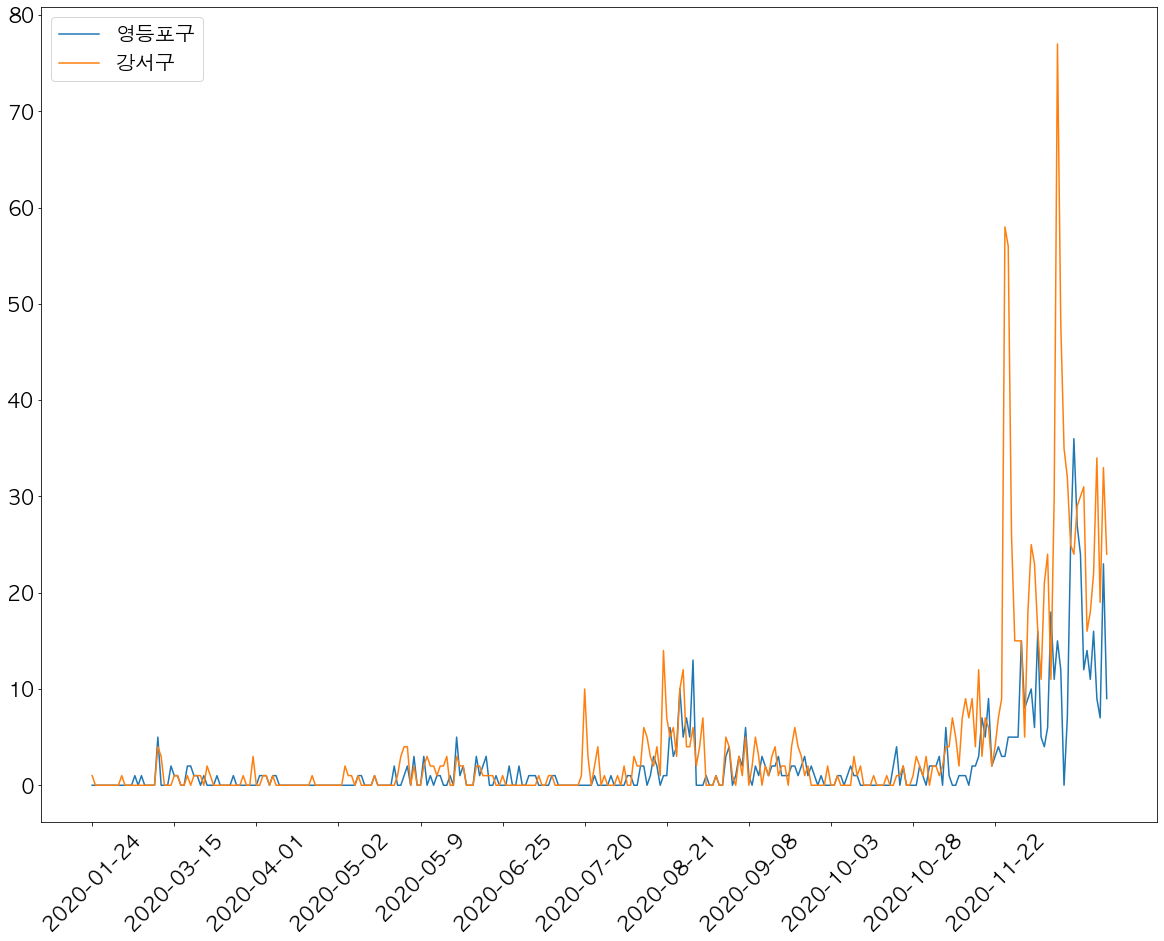

In [197]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
corona_seoul = pd.read_csv('../static/data/서울코로나.csv')
col_list = corona_seoul.columns[1:]
x_index = corona_seoul['확진일']
gu_list = ['영등포구','강서구']
plt.figure(figsize=(20,15))
for gu in gu_list:
    plt.plot(x_index ,corona_seoul[gu], '-',label=gu); 
plt.xticks(np.arange(0,300,step=25),fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [203]:
corona_seoul['확진일'] = pd.to_datetime(corona_seoul['확진일'])

In [244]:
import datetime
corona_seoul_select = corona_seoul[datetime.datetime.strptime('2020-12-15','%Y-%m-%d')>corona_seoul['확진일']][corona_seoul['확진일']>datetime.datetime.strptime('2020-01-06','%Y-%m-%d')]

In [245]:
corona_seoul_select.reset_index(drop=True,inplace=True)

In [246]:
corona_seoul_select

,확진일,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,금천구,...,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,중로구,타시도,합계
0,2020-01-24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
2,2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0
3,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0
4,2020-02-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2020-12-10,15.0,9.0,3.0,30.0,15.0,6.0,9.0,0.0,0.0,...,16.0,11.0,8.0,11.0,2.0,3.0,16.0,0.0,11.0,252.0
294,2020-12-11,23.0,12.0,9.0,77.0,13.0,8.0,8.0,9.0,0.0,...,14.0,15.0,2.0,13.0,4.0,7.0,13.0,0.0,12.0,362.0
295,2020-12-12,16.0,17.0,5.0,48.0,20.0,11.0,7.0,10.0,0.0,...,17.0,12.0,10.0,14.0,7.0,3.0,22.0,0.0,17.0,399.0
296,2020-12-13,11.0,18.0,8.0,35.0,13.0,13.0,2.0,9.0,0.0,...,8.0,0.0,4.0,7.0,2.0,5.0,8.0,0.0,5.0,219.0


In [247]:
count = corona_seoul_select['확진일'].count()
np.arange(1,count,step=2)

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297])

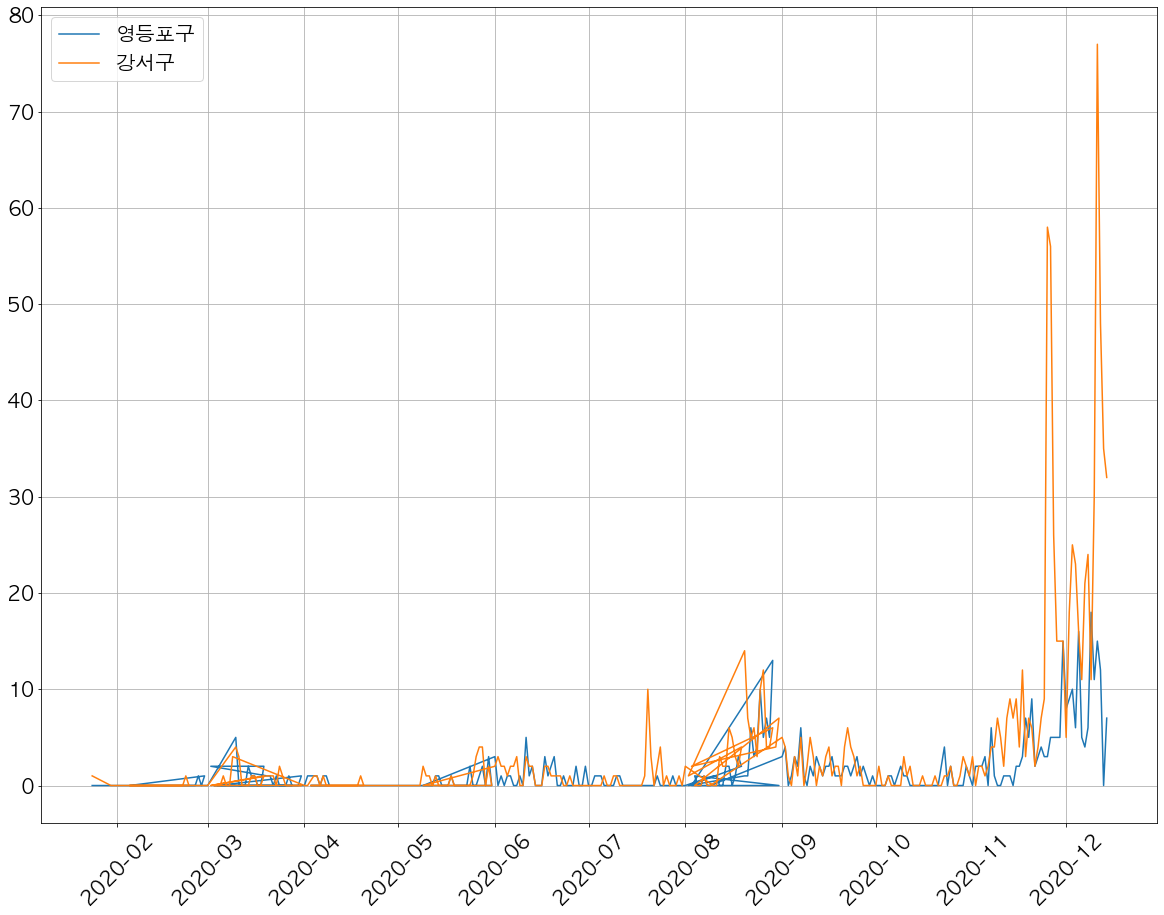

In [249]:
col_list = corona_seoul_select.columns[1:]
x_index = corona_seoul_select['확진일']
gu_list = ['영등포구','강서구']
plt.figure(figsize=(20,15))
count = corona_seoul_select['확진일'].count()
for gu in gu_list:
    plt.plot(x_index ,corona_seoul_select[gu], '-',label=gu); 
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.show()

In [18]:
# 1page만 해보기
import requests
from urllib.parse import urlparse,quote
import pandas as pd
from bs4 import BeautifulSoup
import datetime
from tqdm import tqdm_notebook
key_fd = open('../static/data/covid19apikey.txt', mode='r')
govapi_key = key_fd.read(100)
key_fd.close()
dict_list=[]
day_delta = datetime.timedelta(days=1)
a1 = '2020-03-01'
b1 = '2020-12-30'
start = datetime.datetime.strptime(a1, '%Y-%m-%d')
end = datetime.datetime.strptime(b1, '%Y-%m-%d')
for i in tqdm_notebook(range((end - start).days)):
    date = (start + i*day_delta)
    raw_dict = {'날짜': date,'제주':0, '경남':0,'경북':0,'전남':0,'전북':0,'충남':0,'충북':0,'강원':0,'경기':0,'세종':0,'울산':0,'대전':0,'광주':0,'인천':0,'대구':0,'부산':0,'서울':0}
    start_date = date.strftime('%Y%m%d')
    end_date = date.strftime('%Y%m%d')
    page = 1
    corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    url = f'{corona_url}?ServiceKey={govapi_key}&pageNo={page}&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text,'xml')
    items = soup.find_all('item')
    for k in range(len(items)):
        raw_dict[items[k].find('gubun').get_text()] = items[k].find('incDec').get_text()
    dict_list.append(raw_dict)
df_corona = pd.DataFrame(dict_list)
df_corona

,날짜,제주,경남,경북,전남,전북,충남,충북,강원,경기,세종,울산,대전,광주,인천,대구,부산,서울,검역,합계
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,2020-03-02,0,4,67,0,1,13,1,8,7,0,3,0,0,0,469,3,10,0,586
2,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,2020-03-04,0,1,89,0,0,1,0,1,7,0,3,1,2,2,405,3,1,NaN,516
4,2020-03-05,1,9,87,-1,0,4,1,2,9,0,0,1,1,0,321,-1,4,NaN,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2020-12-25,20,15,67,5,14,80,42,14,264,1,12,13,36,55,23,22,552,6,1241
300,2020-12-26,24,22,34,6,37,61,38,36,255,1,8,11,28,55,13,27,466,10,1132
301,2020-12-27,7,44,34,5,8,58,24,23,241,6,1,8,17,61,21,40,362,10,970
302,2020-12-28,11,25,46,7,1,35,31,27,193,2,2,3,12,46,24,34,300,8,807


In [20]:
df_corona.fillna(0,inplace=True)

In [21]:
df_corona.to_csv('../static/data/전국코로나지역별.csv',index=False)

In [9]:
params_list = []
for i in range(len(df_corona)):
    params=[df_corona['날짜'][i],df_corona['제주'][i],df_corona['경남'][i],df_corona['경북'][i],df_corona['전남'][i],df_corona['전북'][i],df_corona['충남'][i],df_corona['충북'][i],df_corona['강원'][i],df_corona['경기'][i],df_corona['세종'][i],df_corona['울산'][i],df_corona['대전'][i],df_corona['광주'][i],df_corona['인천'][i],df_corona['대구'][i],df_corona['부산'][i],df_corona['서울'][i],df_corona['합계'][i]]
    params_list.append(params)
params_list

0-08-03 00:00:00'),
  '0',
  '2',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '5',
  '23'],
 [Timestamp('2020-08-04 00:00:00'),
  '0',
  '0',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '11',
  '0',
  '0',
  '0',
  '2',
  '1',
  '0',
  '1',
  '9',
  '34'],
 [Timestamp('2020-08-05 00:00:00'),
  '0',
  '4',
  '0',
  '0',
  '0',
  '0',
  '6',
  '1',
  '7',
  '0',
  '0',
  '0',
  '1',
  '1',
  '1',
  '0',
  '6',
  '33'],
 [Timestamp('2020-08-06 00:00:00'),
  '0',
  '1',
  '4',
  '2',
  '0',
  '2',
  '1',
  '2',
  '13',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '3',
  '9',
  '43'],
 [Timestamp('2020-08-07 00:00:00'),
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '5',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '9',
  '20'],
 [Timestamp('2020-08-08 00:00:00'),
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '18',
  '0',
  '0',
  '0',
  '0',
  '2',
  '1',
  '0',
  '17',
  '43'],
 [Timestamp('2020-08-09 00:0